In [52]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('accidents.csv')

In [54]:
df.head()

road_type  curve_density  population_density  is_hilly  is_forest  \
0       ODR              1                   2     False      False   
1        NH              2                   4     False      False   
2        VR              3                   4      True       True   
3       ODR              2                   5     False      False   
4        NH              4                   2     False      False   

   animal_density road_bumps  is_nighttime is_drunk  accident  
0               5       None          True       No         0  
1               2       None         False      Yes         0  
2               3        Few          True       No         0  
3               2       None         False       No         0  
4               3        Few         False       No         0

In [55]:
df.tail()

road_type  curve_density  population_density  is_hilly  is_forest  \
9995        NH              3                   2     False       True   
9996        NH              2                   4     False      False   
9997        NH              3                   2     False       True   
9998        NH              4                   3      True      False   
9999        NH              4                   4     False      False   

      animal_density road_bumps  is_nighttime is_drunk  accident  
9995               4       Many         False       No         0  
9996               2       None          True       No         0  
9997               4       Many         False       No         0  
9998               4       None         False       No         0  
9999               2       None         False       No         0

In [56]:
df.size

100000

In [57]:
df.shape

(10000, 10)

In [58]:
df.columns

Index(['road_type', 'curve_density', 'population_density', 'is_hilly',
       'is_forest', 'animal_density', 'road_bumps', 'is_nighttime', 'is_drunk',
       'accident'],
      dtype='object')

In [59]:
df['accident'].unique()

array([0, 1])

In [60]:
df.dtypes

road_type             object
curve_density          int64
population_density     int64
is_hilly                bool
is_forest               bool
animal_density         int64
road_bumps            object
is_nighttime            bool
is_drunk              object
accident               int64
dtype: object

In [61]:
df['accident'].value_counts()

0    9694
1     306
Name: accident, dtype: int64

In [63]:
df.columns

Index(['road_type', 'curve_density', 'population_density', 'is_hilly',
       'is_forest', 'animal_density', 'road_bumps', 'is_nighttime', 'is_drunk',
       'accident'],
      dtype='object')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

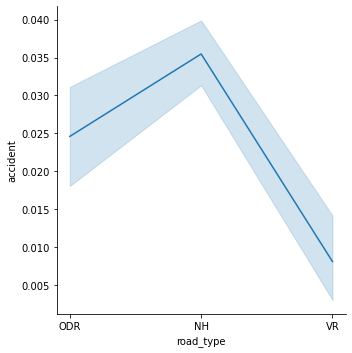

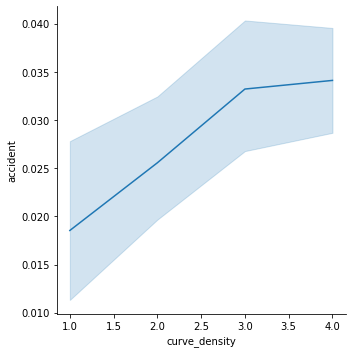

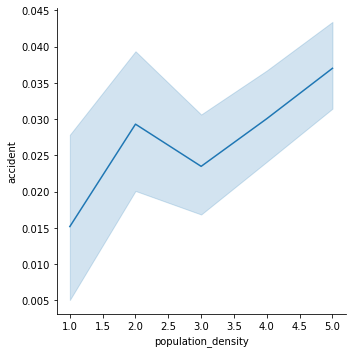

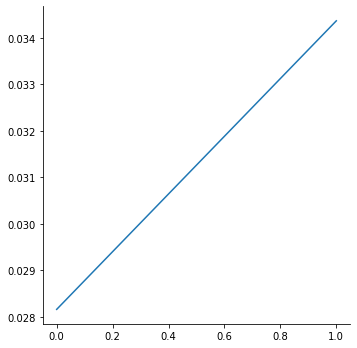

In [73]:
# Create a relplot for each input variable to visualize its relationship with the target variable
sns.relplot(data=df, x='road_type', y='accident', kind='line')
sns.relplot(data=df, x='curve_density', y='accident', kind='line')
sns.relplot(data=df, x='population_density', y='accident', kind='line')
sns.relplot(data=df, x='is_hilly', y='accident', kind='line')
sns.relplot(data=df, x='is_forest', y='accident', kind='line')
sns.relplot(data=df, x='animal_density', y='accident', kind='line')
sns.relplot(data=df, x='road_bumps', y='accident', kind='line')
sns.relplot(data=df, x='is_nighttime', y='accident', kind='line')
sns.relplot(data=df, x='is_drunk', y='accident', kind='line')

# Display the plots
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

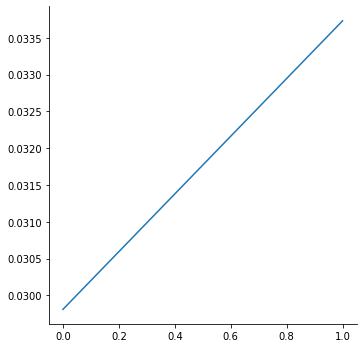

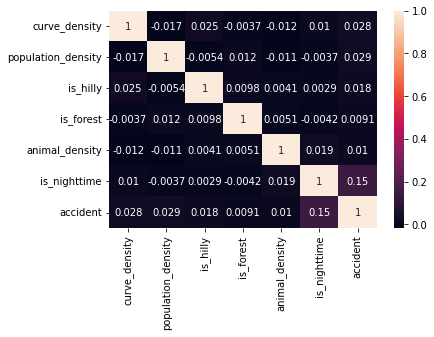

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index(['road_type', 'curve_density', 'population_density', 'is_hilly',
       'is_forest', 'animal_density', 'road_bumps', 'is_nighttime', 'is_drunk',
       'accident'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   road_type           10000 non-null  object
 1   curve_density       10000 non-null  int64 
 2   population_density  10000 non-null  int64 
 3   is_hilly            10000 non-null  bool  
 4   is_forest           10000 non-null  bool  
 5   animal_density      10000 non-null  int64 
 6   road_bumps          10000 non-null  object
 7   is_nighttime        10000 non-null  bool  
 8   is_drunk            10000 non-null  object
 9   accident            10000 non-null  int64 
dtypes: bool(3), int64(4), object(3)
memory usage: 576.3+ KB


In [21]:
df = pd.get_dummies(df)

In [22]:
df.columns

Index(['curve_density', 'population_density', 'is_hilly', 'is_forest',
       'animal_density', 'is_nighttime', 'accident', 'road_type_NH',
       'road_type_ODR', 'road_type_VR', 'road_bumps_Few', 'road_bumps_Many',
       'road_bumps_None', 'is_drunk_No', 'is_drunk_Yes'],
      dtype='object')

In [75]:
df["road_Type"].unique()

KeyError: 'road_Type'

In [74]:
df["road_bumps"].unique()

array(['None', 'Few', 'Many'], dtype=object)

### Seperating features and target label

In [23]:
features = df[['curve_density', 'population_density', 'is_hilly', 'is_forest',
       'animal_density', 'is_nighttime', 'road_type_NH',
       'road_type_ODR', 'road_type_VR', 'road_bumps_Few', 'road_bumps_Many',
       'road_bumps_None', 'is_drunk_No', 'is_drunk_Yes']]
target = df['accident']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['accident']

In [24]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [25]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  97.3
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1946
           1       0.00      0.00      0.00        54

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [30]:
score

array([0.9695, 0.9695, 0.9695, 0.9695, 0.969 ])

### Saving trained Decision Tree model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9725
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1946
           1       0.00      0.00      0.00        54

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



In [33]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.969 , 0.969 , 0.96  , 0.9695, 0.9685])

### Saving trained Guassian Naive Bayes model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.973
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1946
           1       0.00      0.00      0.00        54

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



In [36]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.9695, 0.9695, 0.9695, 0.9695, 0.969 ])

In [37]:
#Saving trained SVM model

In [38]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.973
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1946
           1       0.00      0.00      0.00        54

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.9695, 0.9695, 0.9695, 0.9695, 0.969 ])

### Saving trained Logistic Regression model

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.971
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1946
           1       0.17      0.02      0.03        54

    accuracy                           0.97      2000
   macro avg       0.57      0.51      0.51      2000
weighted avg       0.95      0.97      0.96      2000



In [43]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.9635, 0.9585, 0.9645, 0.963 , 0.9625])

### Saving trained Random Forest model

In [44]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [45]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[10:16:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9685
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1946
           1       0.00      0.00      0.00        54

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.95      0.97      0.96      2000



In [46]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[10:16:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.969 , 0.968 , 0.9675, 0.9675, 0.967 ])

### Saving trained XGBoost model

In [47]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [76]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XB, 'xg_boost_recomondation.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xg_boost_recomondation.pkl')
 
# Use the loaded model to make predictions

## Accuracy Comparison

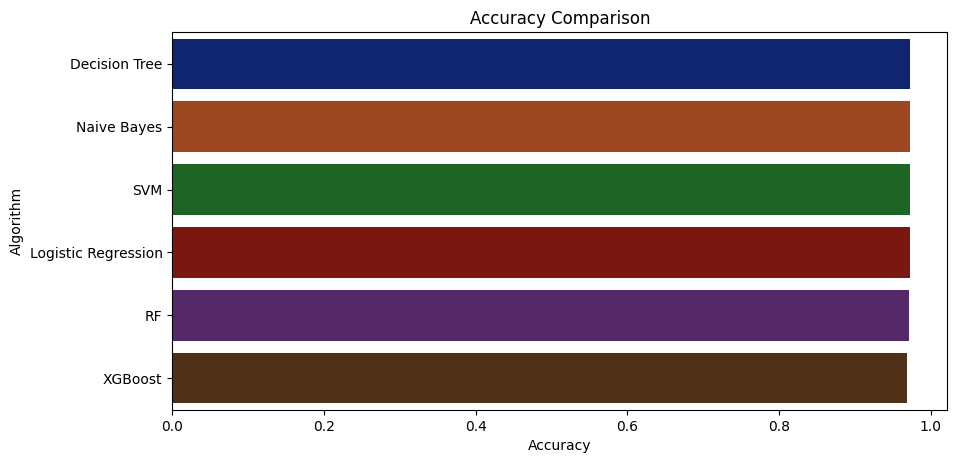

In [77]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [78]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.973
Naive Bayes --> 0.9725
SVM --> 0.973
Logistic Regression --> 0.973
RF --> 0.971
XGBoost --> 0.9685


In [79]:
data = np.array([[12, 21, 0, 1, 33, 0, 1, 0, 1, 1, 0, 0, 1, 0]])
prediction = XB.predict(data)
print(prediction)

[0]
